# Table of Contents
 <p>

In [1]:
import pandas as pd
import numpy as np
import scipy as scipy
import sklearn.decomposition
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import os
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})


%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [48]:
array = []
i = 0
with open('/Users/dangeles/Downloads/cel235_bed_file_ucsc.txt', 'r') as f:
    for line in f:
        a = f.readline().split('\t')
        if a[0] != '':
            try:
                array.append([a[0], a[3]])
            except:
                print(a)
                print('uh oh')

name_dict = {}
with open('/Users/dangeles/Downloads/cel235_ensembl_to_gene_name', 'r') as f:
    for line in f:
        a = f.readline().strip().split('\t')
        name_dict[a[0]] = a[1]

In [49]:
chrom = pd.DataFrame(array, columns=['chr', 'target_id'])

In [50]:
ensembl = pd.read_csv('/Users/dangeles/Downloads/cel235_ensembl_to_gene_name', sep='\t')
ensembl.columns = ['target_id', 'ens_gene']

In [51]:
tidy  = pd.read_csv('../output/dpy_22_results.csv')

In [52]:
chrom['ext_gene'] = chrom.target_id.map(name_dict)

In [59]:
total = len(chrom[chrom.ext_gene.isin(tidy.ext_gene)])
array = []
for name, chrom_group in chrom.groupby('chr'):
    print(name, chrom_group[chrom_group.ext_gene.isin(tidy.ext_gene)].shape[0])
    for name2, phenotype in tidy.groupby('phenotypic class'):
        if name2 == 'bx93 specific':
            continue
#         total = chrom[chrom.ext_gene.isin(group2.ext_gene)].shape[0]
        found = len(chrom_group[chrom_group.ext_gene.isin(phenotype.ext_gene)].ext_gene.unique())
        frac = 100*found/len(chrom_group.ext_gene.unique())
        expected = len(chrom_group[chrom_group.ext_gene.isin(tidy.ext_gene)].ext_gene.unique())/total*100
        print(name, name2, '{0:.3g}%, {1:.3g}'.format(frac, expected))
        array.append([name, name2, frac, frac - expected])
        
df = pd.DataFrame(array, columns=['chr', 'phenotype', 'percent found', 'excess'])

chrI 2603
chrI bx93 associated 0.623%, 3.89
chrI sy622 associated 2.1%, 3.89
chrI sy622 specific 7.63%, 3.89
chrI transhet specific 6.77%, 3.89
chrII 2843
chrII bx93 associated 0.821%, 3.85
chrII sy622 associated 1.71%, 3.85
chrII sy622 specific 6.71%, 3.85
chrII transhet specific 4.79%, 3.85
chrIII 2350
chrIII bx93 associated 1.19%, 3.69
chrIII sy622 associated 2.99%, 3.69
chrIII sy622 specific 8.19%, 3.69
chrIII transhet specific 5.29%, 3.69
chrIV 6595
chrIV bx93 associated 0.338%, 4.51
chrIV sy622 associated 0.765%, 4.51
chrIV sy622 specific 2.24%, 4.51
chrIV transhet specific 1.76%, 4.51
chrM 18
chrM bx93 associated 0%, 0.00476
chrM sy622 associated 0%, 0.00476
chrM sy622 specific 100%, 0.00476
chrM transhet specific 0%, 0.00476
chrV 3783
chrV bx93 associated 1.4%, 4.55
chrV sy622 associated 2.67%, 4.55
chrV sy622 specific 5.48%, 4.55
chrV transhet specific 3.17%, 4.55
chrX 2814
chrX bx93 associated 1.3%, 3.28
chrX sy622 associated 1.55%, 3.28
chrX sy622 specific 5.39%, 3.28
chrX t

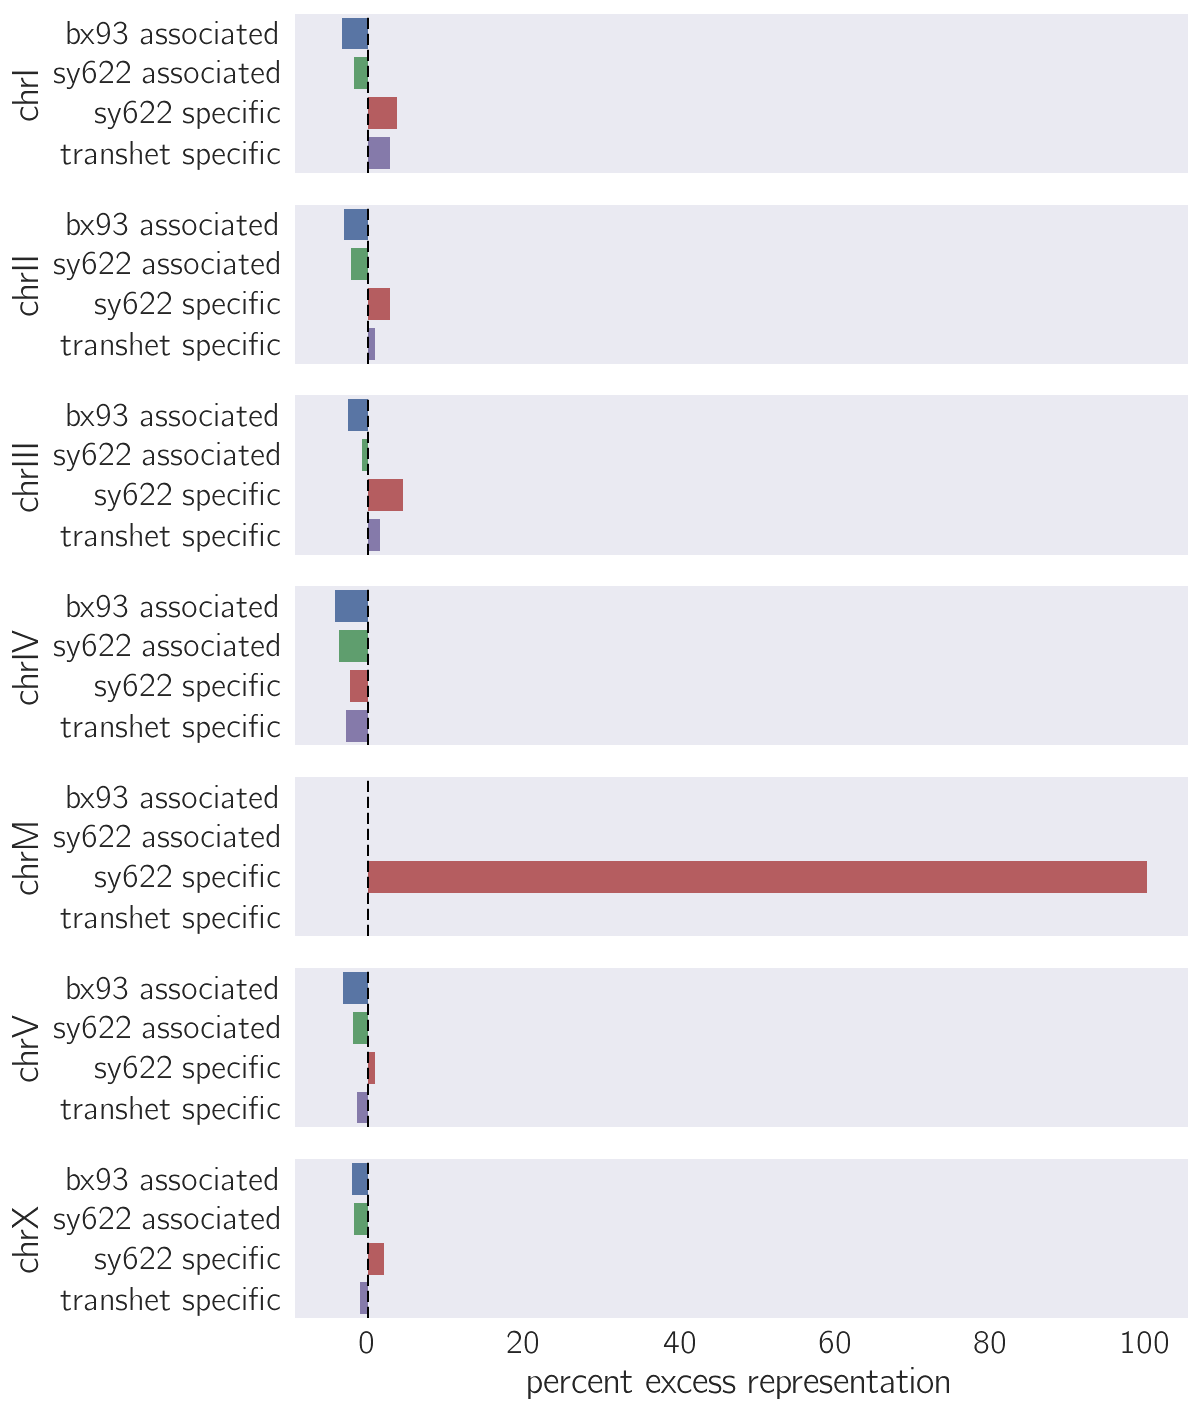

In [66]:
fig, ax =  plt.subplots(7, 1, figsize=(8, 12), sharex=True)

i = 0
for name, group in df.groupby('chr'):
    axi = ax[i]
    sns.barplot(group['excess'].values, group.phenotype.values, ax=axi)
    axi.set_ylabel(name)
    axi.axvline(0, lw=1, ls='--', color='black')
    i += 1
    
plt.xlabel('percent excess representation')

plt.savefig('../output/chromosomal_representation.pdf', bbox_inches='tight')